In [192]:
import os
import poppy
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import convolution as conv
from matplotlib.colors import LinearSegmentedColormap,SymLogNorm, LogNorm
import matplotlib as mpl
import importlib

PIXELSCL=0.05071*u.arcsecond
stis_resel=(0.05*u.arcsecond)**2
norm=SymLogNorm(6e-9)#,vmin=-1e-3,vmax=1e-3)
zero_color="white"
semi_sym_cm = LinearSegmentedColormap.from_list('my cmap', ['black',zero_color,'purple'])
mpl.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

d=3.2#pc

gain = 4.2*u.electron/u.count #per email, header says 4 
counts_PSF        = 9.4e8*u.electron/gain/u.second
counts_bright_pixel = 2e8*u.electron/gain/u.second
peakpixel=counts_bright_pixel#2.31e8 (was for too bright a star)
counts_PSF=counts_bright_pixel 

In [36]:
home=os.path.expanduser('~')
data_dir=home+ "/Desktop/"

comp1 = "10compse4.fits"
comp2 = "30compscompare.fits"
comp3 = "50compse4.fits"
comp4 = "70compse4.fits"
comp5 = "90compse4.fits"

In [37]:
def zeros_to_nan_profile(profile):
    profile[1][np.where(profile[1]==0)]=np.nan
    return profile

In [167]:
sigma = 1

nmf_10 =  fits.open(data_dir+comp1)
nmf_10[0].header["PIXELSCL"]=PIXELSCL.value
nmf_10_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_10,stddev=True))*u.count

nmf_30 =  fits.open(data_dir+comp2)
nmf_30[0].header["PIXELSCL"]=PIXELSCL.value
nmf_30_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_30,stddev=True))*u.count

nmf_50 =  fits.open(data_dir+comp3)
nmf_50[0].header["PIXELSCL"]=PIXELSCL.value
nmf_50_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_50,stddev=True))*u.count

nmf_70 =  fits.open(data_dir+comp4)
nmf_70[0].header["PIXELSCL"]=PIXELSCL.value
nmf_70_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_70,stddev=True))*u.count

nmf_90 =  fits.open(data_dir+comp5)
nmf_90[0].header["PIXELSCL"]=PIXELSCL.value
nmf_90_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_90,stddev=True))*u.count

tiny_tim = fits.open('eps_eri_psf_counts.fits')
tiny_tim[0].header["PIXELSCL"]=PIXELSCL.value
tiny_tim_avg = zeros_to_nan_profile(poppy.utils.radial_profile(tiny_tim,stddev=True))*u.count

classical = fits.open('eps_eri_all.fits')
classical[0].header["PIXELSCL"]=PIXELSCL.value
classical_std = zeros_to_nan_profile(poppy.utils.radial_profile(classical,stddev=True))*u.count

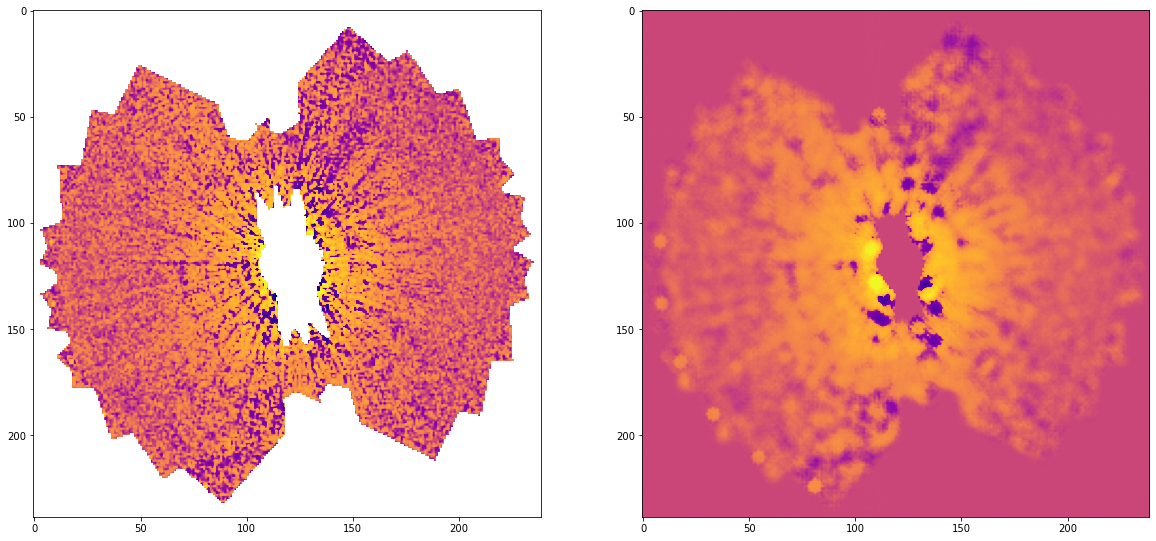

In [275]:
import astropy.io.fits as fits
#kern=conv.Gaussian2DKernel((0.15*u.arcsecond/PIXELSCL))
kern=conv.Tophat2DKernel(3)

smoothed_nmf = conv.convolve_fft(nmf_90[0].data/peakpixel,kern,
                                        nan_treatment="fill",
                                        #ignore_edge_zeros=True,
                                        normalize_kernel=True)

plt.subplot(121)
plt.imshow(nmf_90[0].data/peakpixel,
           cmap="plasma",
           #vmax=51e-8,
           #vmin=-51e-8,
           norm=norm)

plt.subplot(122)
plt.imshow(smoothed_nmf,
           cmap="plasma",
           #vmax=51e-8,
           #vmin=-51e-8,
           norm=norm)

#hdu = fits.PrimaryHDU(smoothed_nmf)
fits.writeto('smoothed_nmf90.fits',smoothed_nmf.value,overwrite=True)

In [276]:
ye = fits.getdata('smoothed_nmf90.fits')

In [277]:
smth = fits.open('smoothed_nmf90.fits')
smth[0].header["PIXELSCL"]=PIXELSCL.value
smth_std = zeros_to_nan_profile(poppy.utils.radial_profile(smth,stddev=True))*u.count

In [278]:
smth_std

<Quantity [[2.53550000e-02, 7.60650000e-02, 1.26775000e-01,
            1.77485000e-01, 2.28195000e-01, 2.78905000e-01,
            3.29615000e-01, 3.80325000e-01, 4.31035000e-01,
            4.81745000e-01, 5.32455000e-01, 5.83165000e-01,
            6.33875000e-01, 6.84585000e-01, 7.35295000e-01,
            7.86005000e-01, 8.36715000e-01, 8.87425000e-01,
            9.38135000e-01, 9.88845000e-01, 1.03955500e+00,
            1.09026500e+00, 1.14097500e+00, 1.19168500e+00,
            1.24239500e+00, 1.29310500e+00, 1.34381500e+00,
            1.39452500e+00, 1.44523500e+00, 1.49594500e+00,
            1.54665500e+00, 1.59736500e+00, 1.64807500e+00,
            1.69878500e+00, 1.74949500e+00, 1.80020500e+00,
            1.85091500e+00, 1.90162500e+00, 1.95233500e+00,
            2.00304500e+00, 2.05375500e+00, 2.10446500e+00,
            2.15517500e+00, 2.20588500e+00, 2.25659500e+00,
            2.30730500e+00, 2.35801500e+00, 2.40872500e+00,
            2.45943500e+00, 2.51014500e+

Text(0, 0.5, 'mJy/as$^2$')

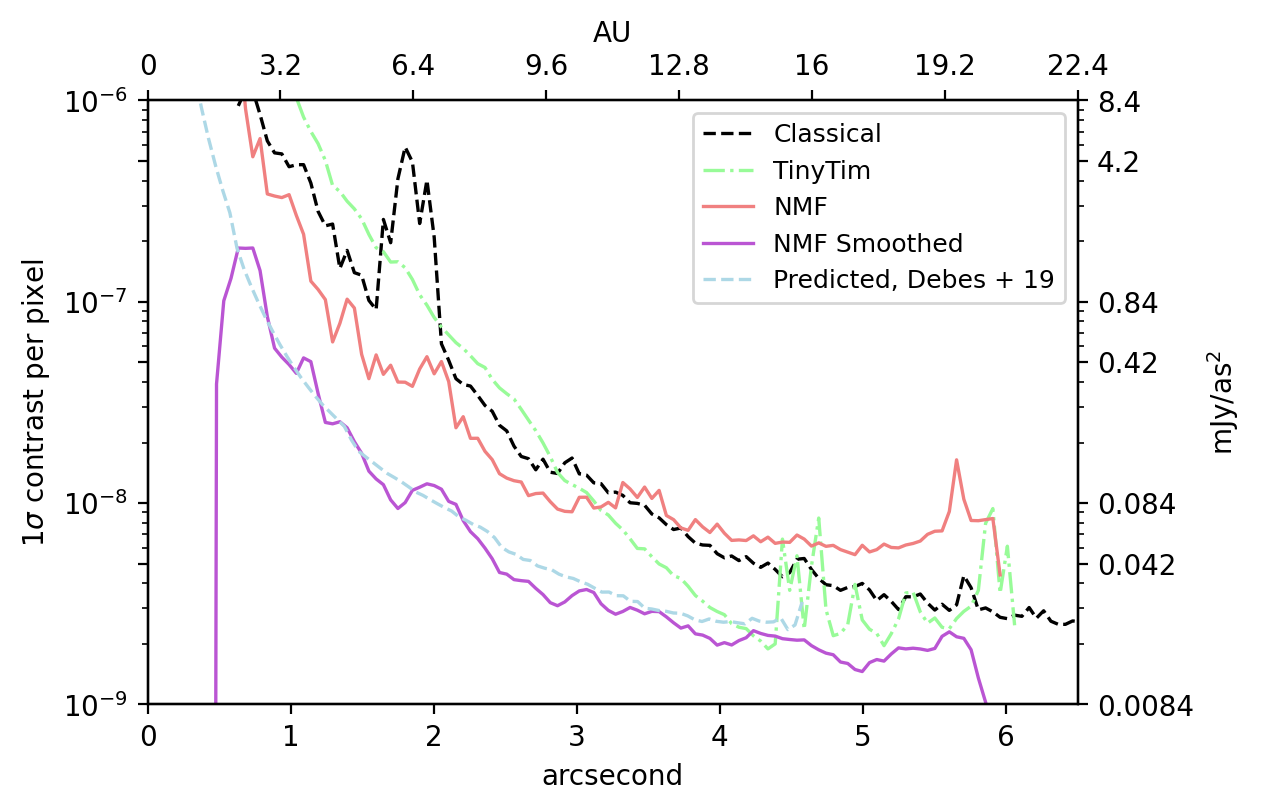

In [279]:
plt.figure(figsize=[6,4],dpi=200)

ax=plt.subplot(111)

#ax.plot(nmf_10_std[0],sigma*nmf_10_std[1]/peakpixel,'-',label='10 components 1e4 maxiters, NMF',color="blue",linewidth=1.2)
#ax.plot(nmf_30_std[0],sigma*nmf_30_std[1]/peakpixel,'-',label='30 components 1e4 maxiters, NMF',color="red",linewidth=1.2)
#ax.plot(nmf_50_std[0],sigma*nmf_50_std[1]/peakpixel,'-',label='50 components 1e4 maxiters, NMF',color="green",linewidth=1.2)
#ax.plot(nmf_70_std[0],sigma*nmf_70_std[1]/peakpixel,'-',label='70 components 1e4 maxiters, NMF',color="magenta",linewidth=1.2)
#ax.plot(nmf_90_std[0],sigma*nmf_90_std[1]/peakpixel,'-',label='90 components 1e4 maxiters, NMF',color="lightcoral",linewidth=1.2)
ax.plot(classical_std[0].value,sigma*classical_std[1]/peakpixel,'--',label='Classical',color="black",linewidth=1.2)
ax.plot(tiny_tim_avg[0,:], np.abs(tiny_tim_avg[1,:]/peakpixel),'-.',color="palegreen", linewidth=1.2, label="TinyTim")
ax.plot(nmf_90_std[0],sigma*nmf_90_std[1]/peakpixel,'-',label='NMF',color="lightcoral",linewidth=1.2)
ax.plot(smth_std[0],sigma*smth_std[1],'-',label='NMF Smoothed',color="mediumorchid",linewidth=1.2)
ax.plot(debx,deby,'--',label='Predicted, Debes + 19',color="lightblue",linewidth=1.2)


ax.set_yscale('log')
plt.legend(loc="upper right",fontsize=9)
ax.set_yticks([1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6])
plt.xlabel("arcsecond")
plt.ylabel("%i$\sigma$ contrast per pixel"%sigma)
ax.set_xlim([0,6.5])
ax.set_ylim([1e-9,1e-6])#Default [1e-9,1e-6] for the rest to work 

ax2 = ax.twinx()
axAU = ax.twiny()
d=3.2#pc
AU_ticks=ax.get_xticks()*d 
ax2.set_yscale('log')



axAU.set_xlim(ax.get_ylim())

axAU.set_xticks(np.array(ax.get_xticks()))
axAU.set_xticklabels(["%.03g"%tick for tick in AU_ticks])
axAU.set_xlabel(r"AU")

Jy_per_count_sec_pix=0.1765*u.millijansky*(u.arcsec**(-2))


ax2.set_ylim(np.array(ax.get_ylim()))
ax2.set_yticks(ax.get_yticks())

surf_B = -(np.log10((ax.get_yticks()))*2.5) #contrast Surface brightness
surf_B =Jy_per_count_sec_pix.value*peakpixel.value*ax.get_yticks() #

ax2.set_yticklabels(["%.03g"%v for v in surf_B])

#ax2.set_ylabel(r"$L_\star/as^2$ [mags]")
ax2.set_ylabel(r"mJy/as$^2$")

In [274]:
nmf_70_std[0][21]

<Quantity 1.090265 ct>

In [272]:
comps10 = sigma*nmf_10_std[1][21]/peakpixel
comps30 = sigma*nmf_30_std[1][21]/peakpixel
comps50 = sigma*nmf_50_std[1][21]/peakpixel
comps70 = sigma*nmf_70_std[1][21]/peakpixel
comps90 = sigma*nmf_90_std[1][21]/peakpixel

In [273]:
print(comps10,comps30,comps50,comps70,comps90)

3.0102994888708523e-07 s 2.8279097554494425e-07 s 2.8054955130040735e-07 s 2.7350462602759105e-07 s 2.1639618515384745e-07 s


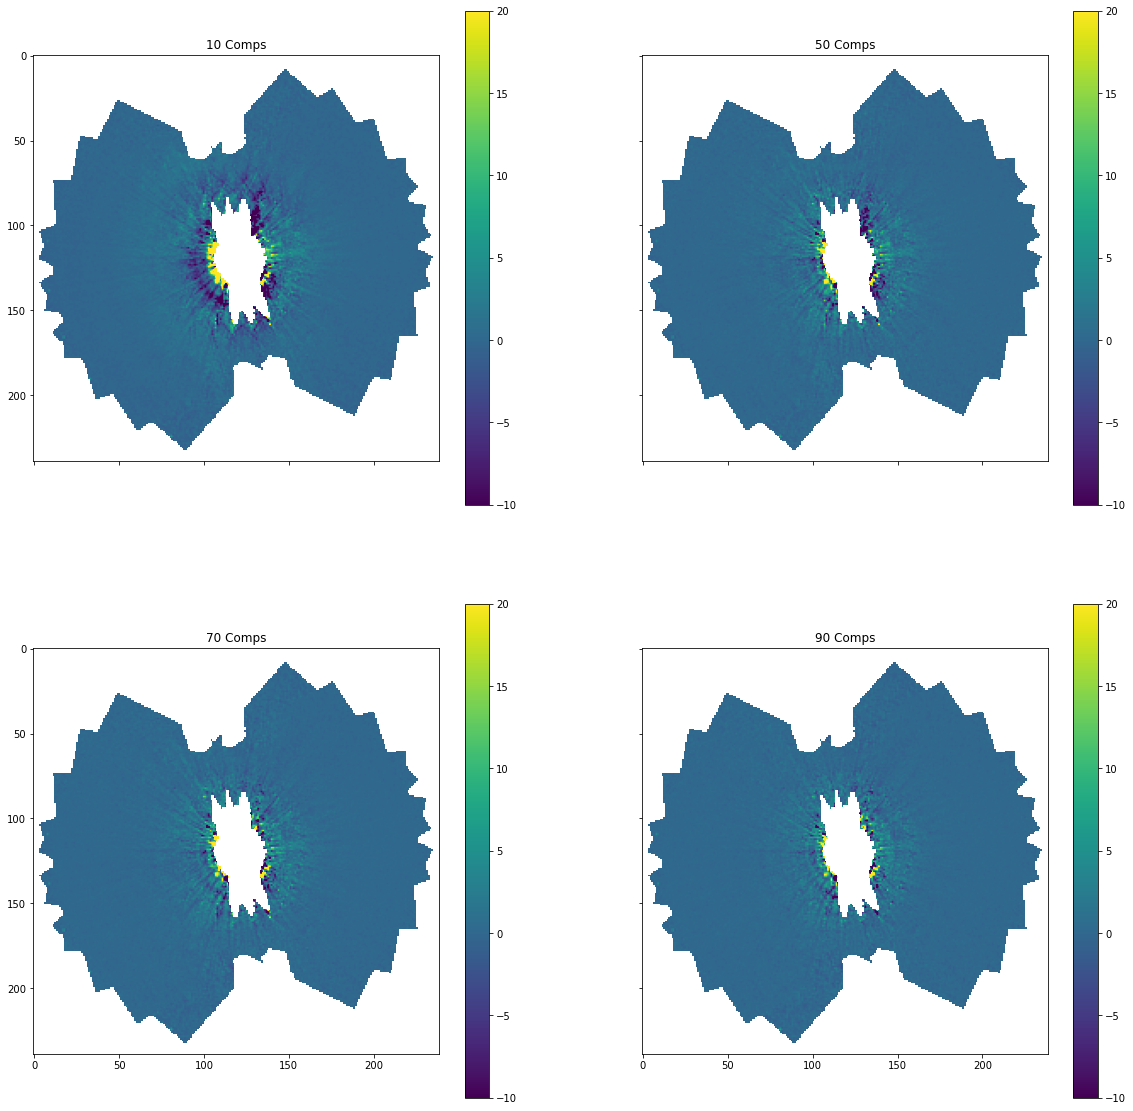

In [228]:
plt.rcParams["figure.figsize"] = (20,20)
fig, axs = plt.subplots(2, 2)
ax1 = axs[0, 0].imshow(nmf_10[0].data,vmin=-10,vmax=20)
axs[0, 0].set_title('10 Comps')
axs[0, 1].imshow(nmf_50[0].data,vmin=-10,vmax=20)
axs[0, 1].set_title('50 Comps')
axs[1, 0].imshow(nmf_70[0].data,vmin=-10,vmax=20)
axs[1, 0].set_title('70 Comps')
axs[1, 1].imshow(nmf_90[0].data,vmin=-10,vmax=20)
axs[1, 1].set_title('90 Comps')

for ax in axs.flat:
    ax.label_outer()
    fig.colorbar(ax1,ax=ax)

In [110]:
debes = np.loadtxt('eps_eri_noise_debes2019.txt')

Text(0, 0.5, 'normalized counts')

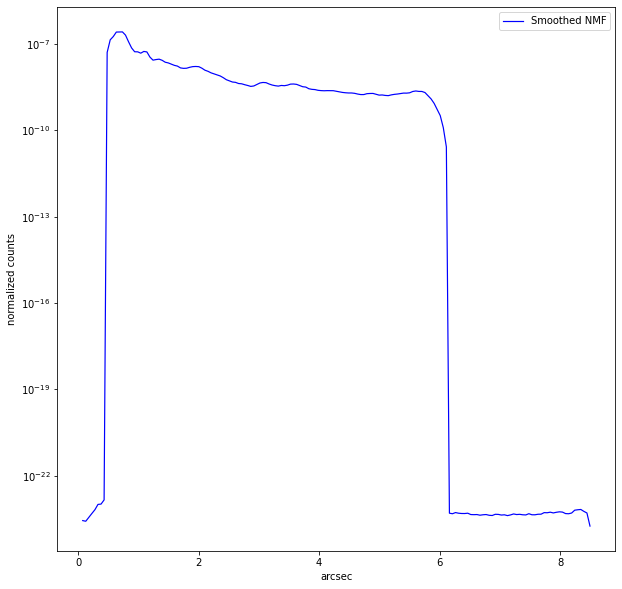

In [218]:
plt.figure(figsize=[10,10])
plt.plot(smth_std[0],sigma*smth_std[1],'-',label='Smoothed NMF',color="blue",linewidth=1.2)
plt.yscale("log")
tiny_tim_avg[1,:]
plt.legend()
plt.xlabel("arcsec")
plt.ylabel("normalized counts")

In [115]:
debx = []
deby = []

for i in range(len(debes)):
    x = debes[i][0]
    y = debes[i][1]
    debx.append(x)
    deby.append(y)

In [229]:
classical1 = fits.getdata(data_dir+'10compsdisk.fits')
classical2 = fits.getdata(data_dir+'90compsdisk.fits')

Text(0.5, 1.0, '10 Comps/ 90 Comps')

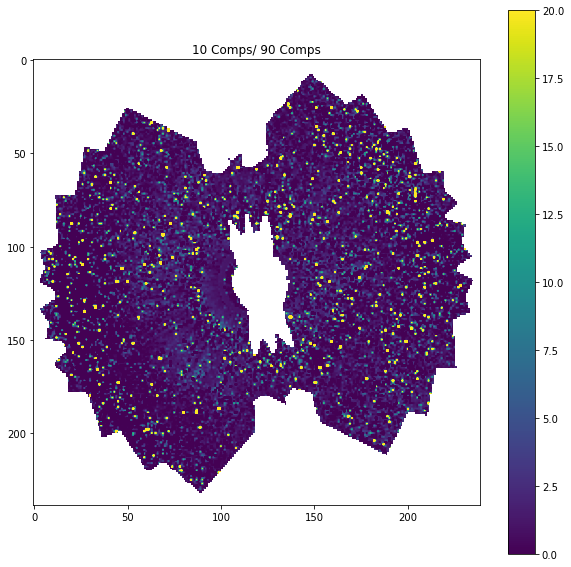

In [240]:
plt.figure(figsize=[10,10])
plt.imshow(classical1/classical2,vmin=0,vmax=20)
plt.colorbar()
plt.title('10 Comps/ 90 Comps')

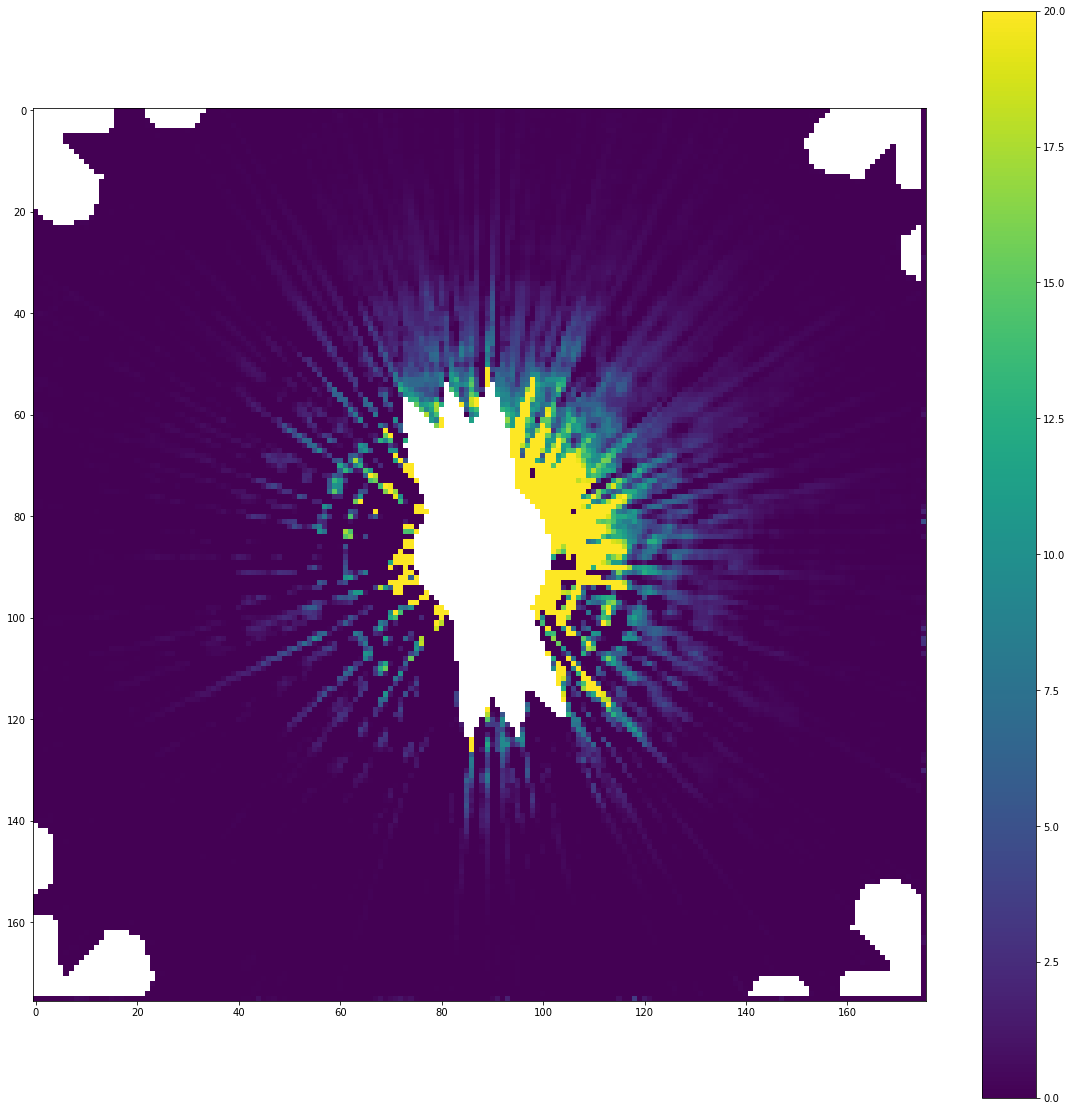

In [165]:
plt.imshow(tinytim,vmin=0,vmax=20)
plt.colorbar()